In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from numpy import asarray
import re
from sklearn.model_selection import train_test_split
import csv

In [11]:
# companyValues = pd.read_csv('CompanyValues.csv')

In [12]:
# companyValues['change'] = 100 * ((companyValues['close_value'] - companyValues['open_value']) / companyValues['open_value'])

In [13]:
# companyValues.head()

In [14]:
# sns.displot(companyValues['change'], binrange = ([-5, 5]))

In [15]:
# # labeling
# # binary
# for i in range(len(companyValues)):
#   if companyValues.loc[i, 'change'] < 0:
#     companyValues.loc[i, 'label'] = 0 
#   else:
#     companyValues.loc[i, 'label'] = 1


In [16]:
# # splitting data by companies
# companies = ['APPL', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']

# for c in companies:
#     df = companyValues[companyValues['ticker_symbol'] == f'c']
#     df.to_csv(f"data/{c}data.csv", index = False)

In [17]:
# width  = 0.9   # width of real body
# width2 = 0.05
# for c in companies:
#        df = pd.read_csv(f'data/{c}data.csv')
#        for i in range(30, len(df)):
#               fig, ax = plt.subplots(figsize=(2, 2), dpi=50)
#               fig.patch.set_facecolor('black')
#               plt.axis('off')
              
#               # find the rows that are bullish
#               dfSlice = df[i-30:i]
#               dfup = dfSlice[dfSlice["close_value"] >= dfSlice["open_value"]]
              
#               # find the rows that are bearish
#               dfdown = dfSlice[dfSlice["close_value"] < dfSlice["open_value"]]
              
#               # plot the bullish candle stick
#               ax.bar(dfup.index, dfup.close_value - dfup.open_value, width, 
#                      bottom = dfup.open_value, edgecolor='g', color='green')
#               ax.bar(dfup.index, dfup.high_value - dfup.close_value, width2, 
#                      bottom = dfup.close_value, edgecolor='g', color='green')
#               ax.bar(dfup.index, dfup.low_value - dfup.open_value, width2, 
#                      bottom = dfup.open_value, edgecolor='g', color='green')
              
#               # plot the bearish candle stick
#               ax.bar(dfdown.index, dfdown.close_value - dfdown.open_value, width, 
#                      bottom = dfdown.open_value, edgecolor='r', color='red')
#               ax.bar(dfdown.index, dfdown.high_value - dfdown.open_value, width2, 
#                      bottom = dfdown.open_value, edgecolor='r', color='red')
#               ax.bar(dfdown.index, dfdown.low_value - dfdown.close_value, width2, 
#                      bottom = dfdown.close_value, edgecolor='r', color='red')
#               ax.grid(color='gray')

#               fig.savefig(f'data/images/{c}_{i}_{int(df.loc[i, "label"])}.png')
#               plt.close()

In [25]:
# companies = ['APPL', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']
# imageNames = pd.DataFrame(columns=['fileName', 'label'])

# for c in companies:
#        df = pd.read_csv(f'data/{c}data.csv')
#        for i in range(30, len(df)):
#             imageNames.loc[len(imageNames)] = [f'{c}_{i}_{int(df.loc[i, "label"])}', int(df.loc[i, "label"])]

In [26]:
# for companyName in companies:
#     df = imageNames[imageNames['fileName'].str.contains(f'{companyName}')]
#     df.to_csv(f'data/{companyName}.csv', index=False)

In [18]:
companies = ['APPL',] # 'GOOG', 'GOOGL', 'MSFT', 'TSLA']
x = []
y = []

for c in companies:
    with open(f'data/{c}.csv', newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[0])
            y.append(row[1])
x = x[1:]
y = [int(i) for i in y[1:]]

x = np.array(x)
y = np.array(y)

In [19]:
# convert images to array of pixels
pixels = np.zeros(shape=(3055, 100, 100))

for i in range(len(x)):
  image = Image.open('data/images/'+ x[i] + '.png', mode='r').convert('L')
  data = asarray(image)
  pixels[i] = data

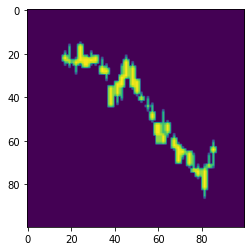

In [20]:
# check if images are loaded correctly
plt.imshow(pixels[0])

In [21]:
pixels = pixels / 255.0 # normalization

# splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(pixels, y, test_size = 0.2, random_state=2) 

In [29]:
#https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial/notebook
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (3, 3),padding = 'Same', activation ='relu', input_shape = (100,100, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))

model.add(Dense(1, activation = "softmax"))

In [30]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
# model.summary()

In [31]:
epochs = 15  # for better result increase the epochs
batch_size = 512

#fit the model
history = model.fit(X_train,Y_train, batch_size=batch_size, epochs = epochs, validation_data = (X_test,Y_test),)# steps_per_epoch=X_train.shape[0] // batch_size)
                              

Epoch 1/15


2022-10-07 16:38:51.178923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5061

2022-10-07 16:38:54.855052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 4s 497ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 2/15
5/5 [==============================] - 1s 232ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 3/15
5/5 [==============================] - 1s 232ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 4/15
5/5 [==============================] - 1s 222ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 5/15
5/5 [==============================] - 1s 224ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 6/15
5/5 [==============================] - 1s 240ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+00 - val_accuracy: 0.5205
Epoch 7/15
5/5 [==============================] - 1s 224ms/step - loss: 0.0000e+00 - accuracy: 0.5061 - val_loss: 0.0000e+0